In [154]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np

In [155]:
df = pd.read_csv("rf_churn.csv")
display(df.head(5))

,prime_days,loot_collected,day_stream_hr,evennig_stream_hr,night_stream_hr,bits_donated,cs_contacts,churn,prime_student,used_sub,day_sessions,evennig_sessions,night_sessions,follows
0,12.8,3,53.02,39.48,48.94,10,1,0,0,1,11,10,10,2
1,10.7,3,32.32,39.10,50.88,14,1,0,0,1,13,11,11,2
2,13.7,0,48.68,24.24,32.52,13,0,0,0,0,12,11,11,3
3,8.4,0,59.88,12.38,39.38,7,2,0,1,0,8,9,9,4
4,7.5,0,33.34,29.66,37.38,11,3,0,1,0,12,13,13,2


In [156]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  3333


,prime_days,loot_collected,day_stream_hr,evennig_stream_hr,night_stream_hr,bits_donated,cs_contacts,churn,prime_student,used_sub,day_sessions,evennig_sessions,night_sessions,follows
Count of values,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0


In [157]:
features = df.drop(["churn"], axis=1).columns

In [158]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [159]:
# set up randomForestClassifier on traning
clf = RandomForestClassifier(n_estimators=30) # trees in forest
clf.fit(df_train[features], df_train["churn"]) # fitting features

# make predictions based on test set
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)
# print(len(df_train))
# print(clf)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [160]:
score = clf.score(df_test[features], df_test["churn"])
print("Accuracy: ", score)

Accuracy:  0.961630695444


,Predicted False,Predicted True
Actual False,727,5
Actual True,27,75


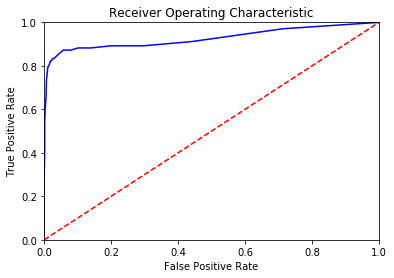

In [161]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["churn"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# fpr and tpr matrix
fpr, tpr, threshold = roc_curve(df_test["churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
2,0.273338,day_stream_hr
6,0.128505,cs_contacts
3,0.108871,evennig_stream_hr
7,0.081962,prime_student
4,0.073815,night_stream_hr
5,0.064895,bits_donated
0,0.064071,prime_days
12,0.049165,follows
9,0.040211,day_sessions
11,0.034631,night_sessions


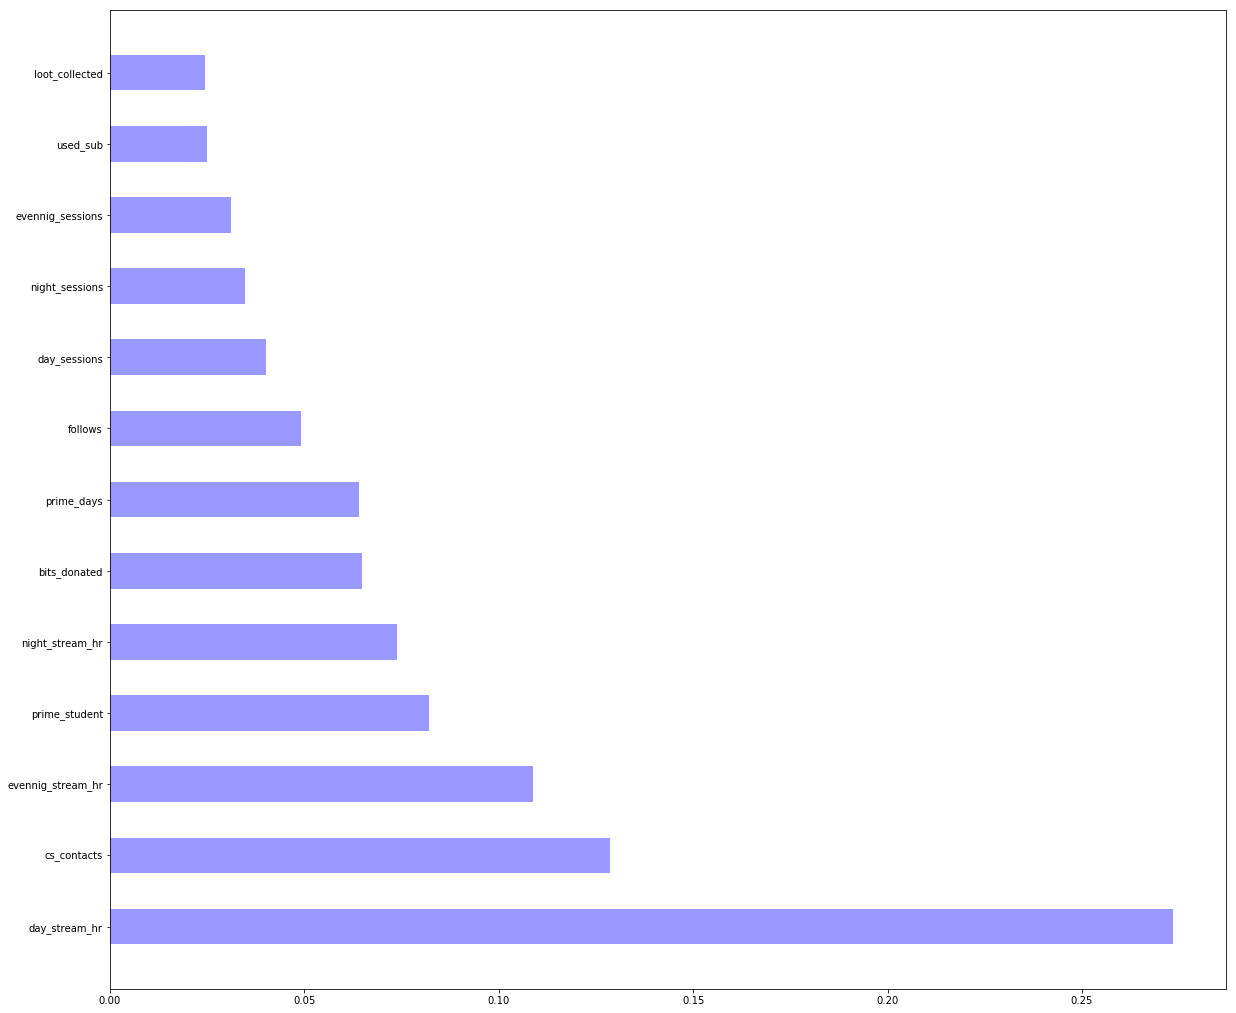

In [162]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(10))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()